Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day 
Rented Bike count - Count of bikes rented at each hour 
Hour - Hour of he day 
Temperature-Temperature in Celsius 
Humidity - % 
Windspeed - m/s 
Visibility - 10m 
Dew point temperature - Celsius 
Solar radiation - MJ/m2 
Rainfall - mm 
Snowfall - cm 
Seasons - Winter, Spring, Summer, Autumn 
Holiday - Holiday/No holiday 
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### 1. Import and warehouse data:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import os
import glob
import time
from sklearn.preprocessing import StandardScaler
sns.set_theme()
#from plotnine import *

In [2]:
bikedata= pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')
bikedata.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
bikedataorig=pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')

In [4]:
bikedataorig.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
print(bikedata.shape)
print(bikedata.size)

(8760, 14)
122640


In [7]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### 2. Data Cleansing

In [9]:
bikedata['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [10]:
bikedata['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [11]:
bikedata['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
bikedata.rename(columns = {'Functioning Day':'FunctioningDay'}, inplace = True)

In [13]:
bikedata.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)

In [14]:
bikedata.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)

In [15]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
bikedataorig.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
for feature in bikedata.columns: # Loop through all columns in the dataframe
    if bikedata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bikedata[feature] = pd.Categorical(bikedata[feature])# Replace strings with an integer
bikedata.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/17,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/17,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/17,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/17,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/17,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [18]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   category
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall                   8760 non-null   float64 
 10  Snowfall                   8760 non-null   float64 
 11  Seasons                    8760 non-null   category
 12  Holiday                    8760 non-null   category
 13  FunctioningDay             8760 n

In [19]:
replaceStruct = {
                "Holiday":     {"No Holiday": 0, "Holiday": 1},
                "FunctioningDay": {"No": 0, "Yes": 1}
                    }
oneHotCols=["Seasons"]

In [20]:
bikedata=bikedata.replace(replaceStruct)
bikedata=pd.get_dummies(bikedata, columns=oneHotCols)
bikedata.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1
5,01/12/17,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1
6,01/12/17,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1
7,01/12/17,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1
8,01/12/17,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1
9,01/12/17,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1


In [21]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   category
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall                   8760 non-null   float64 
 10  Snowfall                   8760 non-null   float64 
 11  Holiday                    8760 non-null   category
 12  FunctioningDay             8760 non-null   category
 13  Seasons_Autumn             8760 n

### 3. EDA

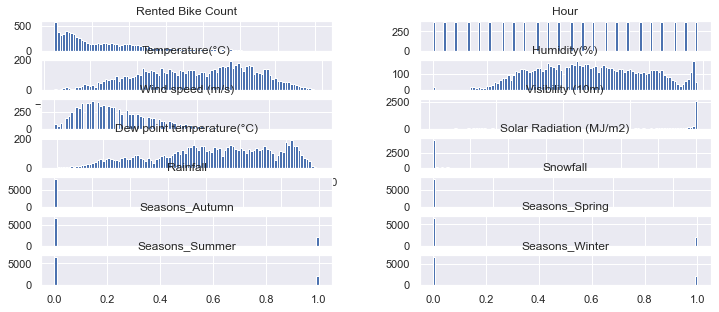

In [22]:
columns = list(bikedata)[1:] # Excluding Outcome column which has only 
bikedata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

In [23]:
bikedata.skew(axis = 0, skipna = True)

<ipython-input-23-38d4c9306e76>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bikedata.skew(axis = 0, skipna = True)


Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall                     14.533232
Snowfall                      8.440801
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
dtype: float64

In [24]:
bikedataorig.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [25]:
def plot_corr(bikedataorig, size=26):
    corr = bikedataorig.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

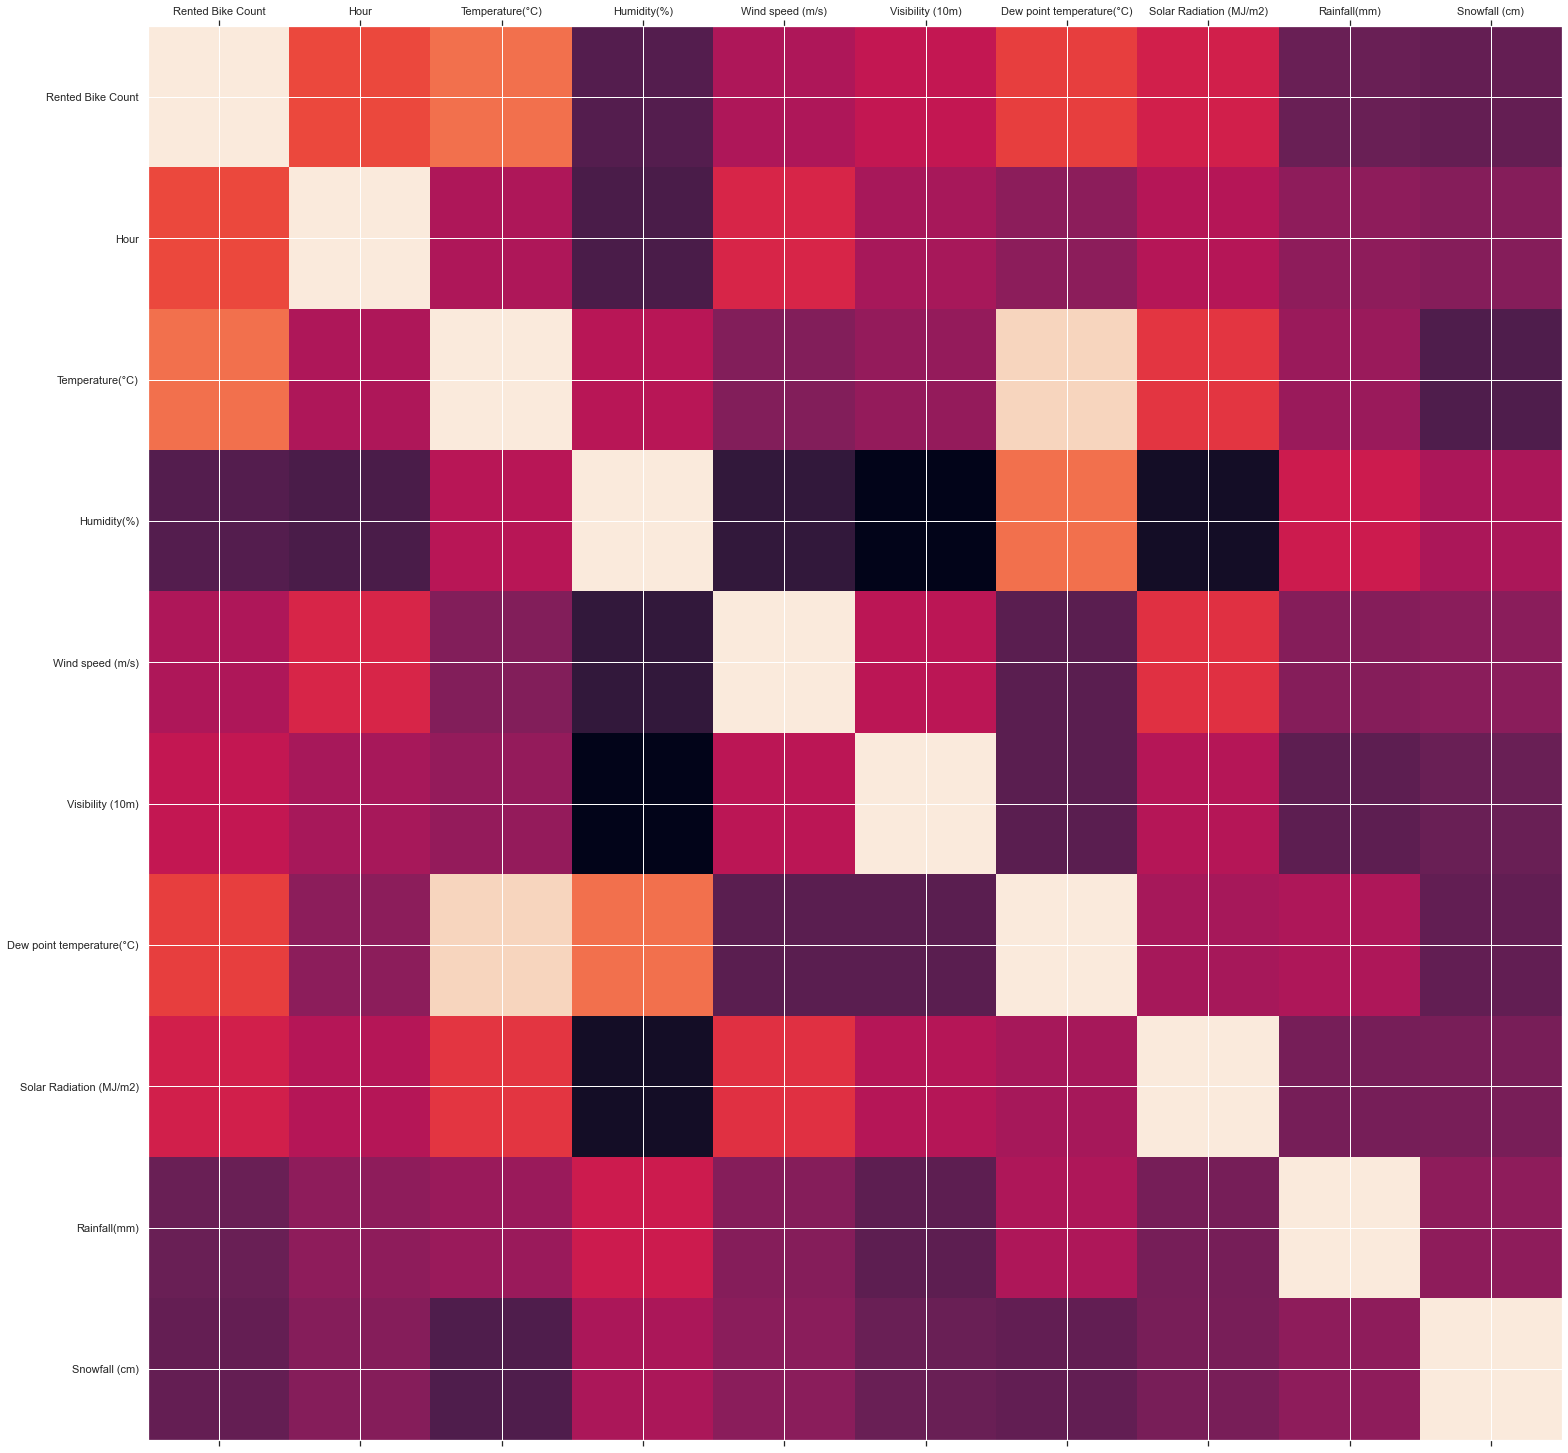

In [26]:
plot_corr(bikedataorig)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

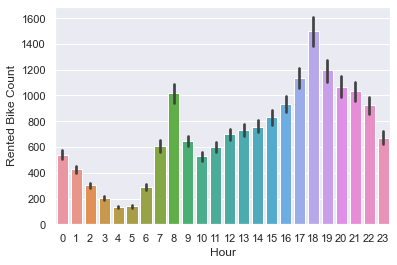

In [27]:
sns.barplot(data=bikedata, x="Hour", y="Rented Bike Count")

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

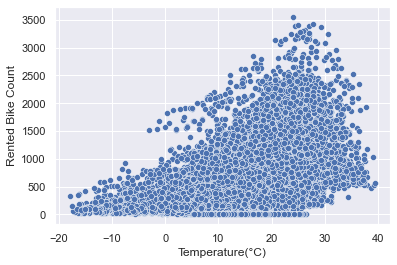

In [28]:
sns.scatterplot(data=bikedata, x="Temperature(°C)", y="Rented Bike Count")

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

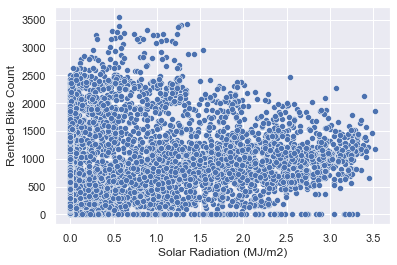

In [29]:
sns.scatterplot(data=bikedata, x="Solar Radiation (MJ/m2)", y="Rented Bike Count")

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

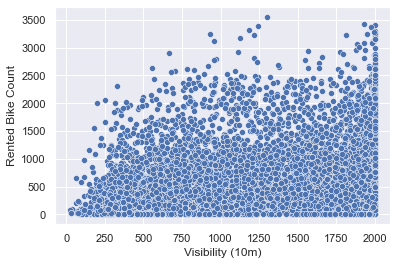

In [30]:
sns.scatterplot(data=bikedata, x="Visibility (10m)", y="Rented Bike Count")

In [31]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [32]:
#sns.pairplot(bikedata,diag_kind='kde')

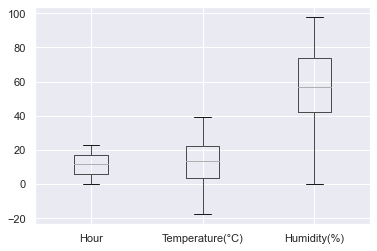

In [33]:
np.random.seed(1234)
boxplot = bikedata.boxplot(column=['Hour', 'Temperature(°C)', 'Humidity(%)'])

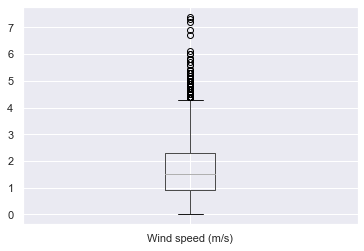

In [34]:
boxplot1=bikedata.boxplot(column=['Wind speed (m/s)'])

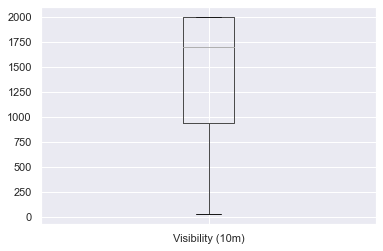

In [35]:
boxplot2=bikedata.boxplot(column=['Visibility (10m)'])

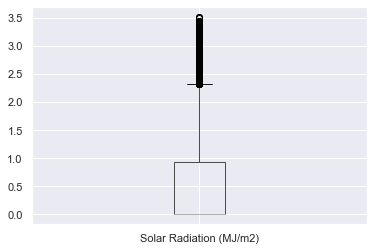

In [36]:
boxplot3=bikedata.boxplot(column=['Solar Radiation (MJ/m2)'])

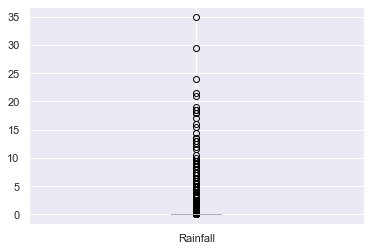

In [37]:
boxplot4=bikedata.boxplot(column=['Rainfall'])

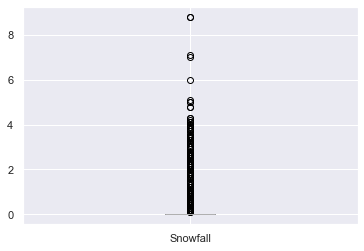

In [38]:
boxplot5=bikedata.boxplot(column=['Snowfall'])

In [39]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   category
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall                   8760 non-null   float64 
 10  Snowfall                   8760 non-null   float64 
 11  Holiday                    8760 non-null   category
 12  FunctioningDay             8760 non-null   category
 13  Seasons_Autumn             8760 n

In [40]:
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall                     0
Snowfall                     0
Holiday                      0
FunctioningDay               0
Seasons_Autumn               0
Seasons_Spring               0
Seasons_Summer               0
Seasons_Winter               0
dtype: int64

In [41]:
bikedata["Rented Bike Count"].head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [42]:
bikedata=bikedata.drop('Date',axis=1)
bikedata=bikedata.drop('Dew point temperature(°C)',axis=1)
bikedata=bikedata.drop('Seasons_Autumn',axis=1)

In [43]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   int64   
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall                 8760 non-null   float64 
 8   Snowfall                 8760 non-null   float64 
 9   Holiday                  8760 non-null   category
 10  FunctioningDay           8760 non-null   category
 11  Seasons_Spring           8760 non-null   uint8   
 12  Seasons_Summer           8760 non-null   uint8   
 13  Seasons_Winter           8760 non-null   uint8   
dtypes: categ

In [44]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1


In [45]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,0.252055,0.252055,0.246575
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,0.434217,0.434217,0.431042
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000


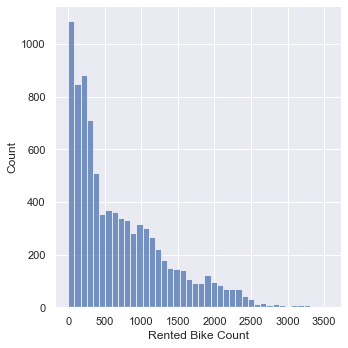

In [46]:
sns.set_theme()
sns.displot(bikedata['Rented Bike Count'])

In [47]:
bikecountmedian = bikedata['Rented Bike Count'].median()
bikecountmedian
#Since the data is right skewed we will consider median in this case if normally distributed we would have consderede mean

504.5

### Converting dataset to a classification Problem

In [48]:
bikecountmedian = bikedata['Rented Bike Count'].median()
print(bikecountmedian)
bikedata["Rented Bike Count"] = np.where(bikedata["Rented Bike Count"] <= bikecountmedian, 0, 1)
bikedata["Rented Bike Count"].unique()

504.5


array([0, 1])

In [49]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1


In [50]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   int64   
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall                 8760 non-null   float64 
 8   Snowfall                 8760 non-null   float64 
 9   Holiday                  8760 non-null   category
 10  FunctioningDay           8760 non-null   category
 11  Seasons_Spring           8760 non-null   uint8   
 12  Seasons_Summer           8760 non-null   uint8   
 13  Seasons_Winter           8760 non-null   uint8   
dtypes: categ

In [51]:
class_names = [0,1]

### Splitting &  Scaling the data

In [52]:
X = bikedata.drop("Rented Bike Count", axis=1)
y = bikedata['Rented Bike Count']

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XScaled=sc.fit_transform(X)
XScaled=pd.DataFrame(XScaled)
XScaled.columns=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall','Snowfall','Holiday','FunctioningDay','Seasons_Spring','Seasons_Summer','Seasons_Winter']
XScaled.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
bikedataScaled=sc.fit_transform(bikedata)
bikedataScaled=pd.DataFrame(bikedata)
bikedataScaled.columns=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall','Snowfall','Holiday','FunctioningDay','Seasons_Spring','Seasons_Summer','Seasons_Winter']
bikedataScaled.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1


In [55]:
XScaled.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,1.520853e-19,-7.169557e-16,1.837825e-16,-1.358312e-16,2.045599e-15,-4.465327e-15,1.918810e-15,-1.404875e-14,6.269807e-15,1.335965e-14,2.811376e-14,2.811376e-14,-4.037732e-14
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.661325e+00,-2.568868e+00,-2.859660e+00,-1.664583e+00,-2.317786e+00,-6.551317e-01,-1.317999e-01,-1.718911e-01,-2.277569e-01,-5.356764e+00,-5.805139e-01,-5.805139e-01,-5.720776e-01
25%,-8.306624e-01,-7.855668e-01,-7.969184e-01,-7.960588e-01,-8.167930e-01,-6.551317e-01,-1.317999e-01,-1.718911e-01,-2.277569e-01,1.866799e-01,-5.805139e-01,-5.805139e-01,-5.720776e-01
50%,0.000000e+00,6.840822e-02,-6.022497e-02,-2.170429e-01,4.293764e-01,-6.436202e-01,-1.317999e-01,-1.718911e-01,-2.277569e-01,1.866799e-01,-5.805139e-01,-5.805139e-01,-5.720776e-01
75%,8.306624e-01,8.051710e-01,7.746943e-01,5.549784e-01,9.258713e-01,4.154376e-01,-1.317999e-01,-1.718911e-01,-2.277569e-01,1.866799e-01,1.722612e+00,1.722612e+00,-5.720776e-01
max,1.661325e+00,2.220090e+00,1.953404e+00,5.476614e+00,9.258713e-01,3.396916e+00,3.089303e+01,1.997826e+01,4.390647e+00,1.866799e-01,1.722612e+00,1.722612e+00,1.748015e+00


In [56]:
bikedataScaled.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.500000,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,0.252055,0.252055,0.246575
std,0.500029,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,0.434217,0.434217,0.431042
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000


### Task - I

### K Means Clustering

In [57]:
x_kmeans = XScaled.iloc[:,[4,1]].values
XScaled.iloc[:,[4,1]].head()

,Visibility (10m),Temperature(°C)
0,0.925871,-1.513957
1,0.925871,-1.539074
2,0.925871,-1.580936
3,0.925871,-1.597680
4,0.925871,-1.580936


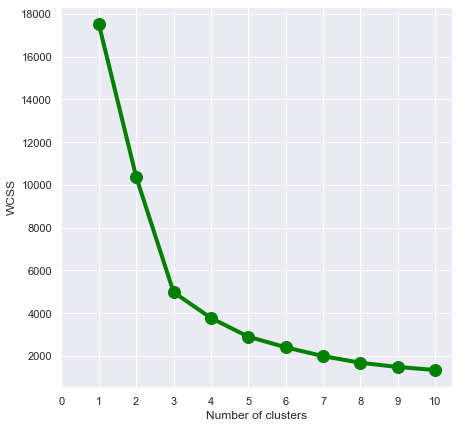

In [58]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_kmeans)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### From above elbow method we can say that we can take 3 clusters .

### Visualizing the clusters

In [59]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_kmeans)

In [60]:
bikedata['Cluster_KM']=model.labels_

In [61]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster_KM
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,2
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,2
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,2
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,2
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,2


In [62]:
bikedataClust = bikedata.groupby(['Cluster_KM'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
Cluster_KM,,,,,,,,,,,,
0,0.385932,10.646818,11.755601,72.613323,1.498400,627.713063,0.358679,0.393822,0.14038,0.379978,0.175288,0.229624
1,0.780148,12.478953,23.201081,55.802332,1.770250,1782.863197,0.888393,0.058362,0.00000,0.201934,0.494027,0.000000
2,0.234650,11.050450,-0.120415,46.440751,1.900587,1811.256160,0.351212,0.015291,0.10966,0.186547,0.000000,0.603442


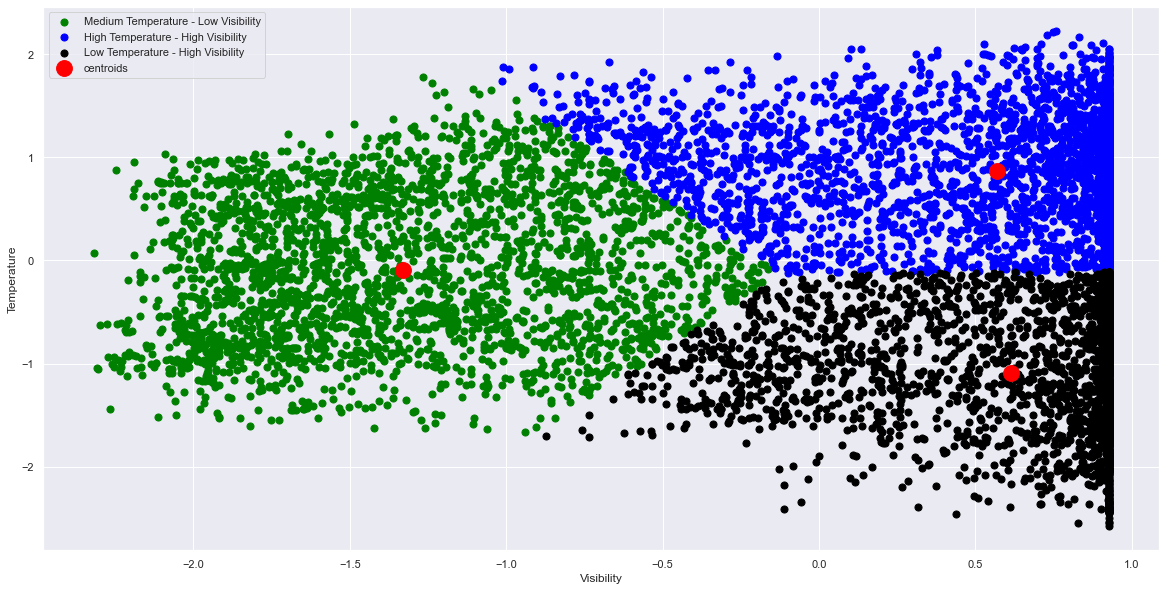

In [63]:
plt.figure(figsize = (20,10))
plt.scatter(x_kmeans[y_clusters == 0,0],x_kmeans[y_clusters == 0,1],s = 50, c = 'green', label = "Medium Temperature - Low Visibility")
plt.scatter(x_kmeans[y_clusters == 1,0],x_kmeans[y_clusters == 1,1],s = 50, c = 'blue', label = "High Temperature - High Visibility")
plt.scatter(x_kmeans[y_clusters == 2,0],x_kmeans[y_clusters == 2,1],s = 50, c = 'black', label = "Low Temperature - High Visibility")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Expectation Maximazation Clustering

In [64]:
x_EM = XScaled.iloc[:,[4,1]].values
XScaled.iloc[:,[4,1]].head()

,Visibility (10m),Temperature(°C)
0,0.925871,-1.513957
1,0.925871,-1.539074
2,0.925871,-1.580936
3,0.925871,-1.597680
4,0.925871,-1.580936


In [65]:
from sklearn import mixture
n_components=[1,2,3,4,5,6,7,8,9,10,11,12,13]
cvtypes=["spherical", "tied", "diag", "full"]
biccvscore=[]
biccomposcore=[]
for i in range(len(cvtypes)):
    gmm = mixture.GaussianMixture(n_components=3,covariance_type=cvtypes[i])
    gmm.fit(x_EM)
    bic=gmm.bic(x_EM)
    biccvscore.append(bic)
print(biccvscore)


[44890.63744640559, 44472.78707909478, 23096.628097456953, 22991.128877846775]


##### From above we can identify full cvtype has less BIC

In [66]:
for i in range(len(n_components)):
    gmm = mixture.GaussianMixture(n_components=n_components[i],covariance_type='full')
    gmm.fit(x_EM)
    bic=gmm.bic(x_EM)
    biccomposcore.append(bic)
print(biccomposcore)

[49754.38422013712, 25990.282048971756, 22992.701452128116, 22318.22260109821, 21821.093870598015, 21097.61994573236, 21000.90945400968, 20430.318364633877, 20372.118482303456, 20329.88177211483, 20311.664195389592, 20336.30349310208, 20228.222343405163]


##### From above we can see there is no much difference from n_components =2 or 3 so we can either use 2 or 3 i will use 2 as k means also provided the same

In [67]:
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=42)
gmm.fit(x_EM)
yclust=gmm.predict(x_EM)
yclust

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
bikedata['Cluster_EM']=yclust
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster_KM,Cluster_EM
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,2,0
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,2,0
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,2,0
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,2,0
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,2,0


In [69]:
bikedataClust = bikedata.groupby(['Cluster_EM'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster_KM
Cluster_EM,,,,,,,,,,,,,
0,0.537424,12.162750,12.911923,50.401654,1.793429,1999.966057,0.411989,0.009399,0.036292,0.166232,0.243255,0.235857,1.409922
1,0.486691,11.264314,12.872609,61.008821,1.700542,1236.563293,0.624986,0.198220,0.088858,0.282575,0.255184,0.250387,0.834107


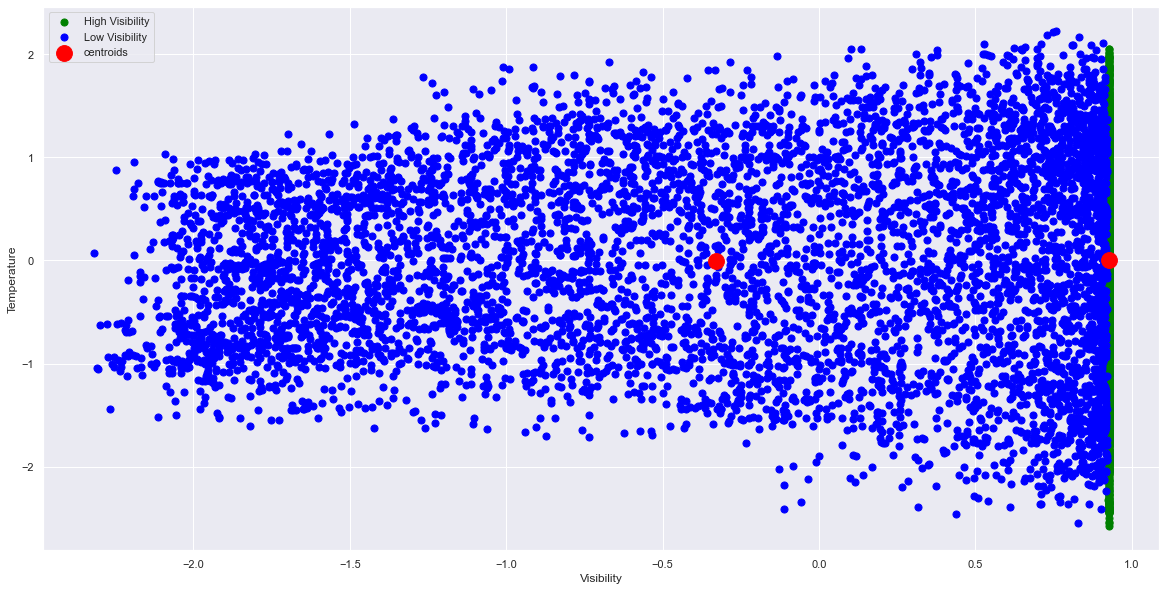

In [70]:
plt.figure(figsize = (20,10))
plt.scatter(x_EM[yclust == 0,0],x_EM[yclust == 0,1],s = 50, c = 'green', label = "High Visibility")
plt.scatter(x_EM[yclust == 1,0],x_EM[yclust == 1,1],s = 50, c = 'blue', label = "Low Visibility")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Task - II

### Decision Tree For Dimensionlity Reduction

### Splitting the Data

In [71]:
bikedata=bikedata.drop('Cluster_KM',axis=1)
bikedata=bikedata.drop('Cluster_EM',axis=1)

In [72]:
X = bikedata.drop("Rented Bike Count", axis=1)
y = bikedata['Rented Bike Count']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [74]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
1444,4,-11.1,50,1.2,1986,0.00,0.0,0.0,0,1,0,0,1
1652,20,-5.8,44,2.1,1994,0.00,0.0,0.0,0,1,0,0,1
7496,8,11.4,66,0.8,1991,0.18,0.0,0.0,1,0,0,0,0
1893,21,-2.3,38,2.3,2000,0.00,0.0,0.0,1,1,0,0,1
3880,16,19.1,54,3.2,542,0.94,0.0,0.0,0,1,1,0,0


In [75]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [76]:
importances_features = dTree.feature_importances_
importances_features

array([0.25033062, 0.34667215, 0.12973642, 0.04156335, 0.03386074,
       0.03273353, 0.02506872, 0.00346138, 0.00253809, 0.0856285 ,
       0.01508902, 0.00354182, 0.02977566])

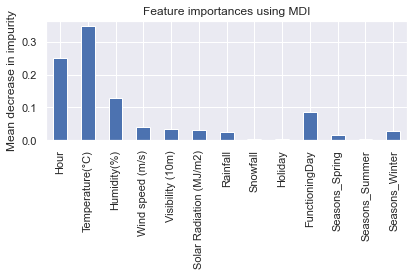

In [77]:
feature_names=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall','Snowfall','Holiday','FunctioningDay','Seasons_Spring','Seasons_Summer','Seasons_Winter']

importances_features = pd.Series(importances_features, index=feature_names)
std = np.std([dTree.feature_importances_ for tree in importances_features], axis=0)
fig, ax = plt.subplots()
importances_features.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

##### From the above we can identify 4 important feature and they are Hour,Temp,Humidity and Functioning Day

### PCA

In [78]:
XScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     8760 non-null   float64
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Holiday                  8760 non-null   float64
 9   FunctioningDay           8760 non-null   float64
 10  Seasons_Spring           8760 non-null   float64
 11  Seasons_Summer           8760 non-null   float64
 12  Seasons_Winter           8760 non-null   float64
dtypes: float64(13)
memory usage: 889.8 KB


In [79]:
covMatrix = np.cov(XScaled,rowvar=False)
#print(covMatrix)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13,random_state=42)
pca.fit(XScaled)
XScaledpca13 = pca.transform(XScaled)

In [81]:
print(pca.explained_variance_)

[2.42661847 2.23944249 1.4399126  1.16149635 1.04210278 0.97314916
 0.92134183 0.82853552 0.70636048 0.6195068  0.30176173 0.2183964
 0.12285957]


In [82]:
print(pca.explained_variance_ratio_)

[0.18664165 0.17224514 0.11074986 0.08933567 0.0801526  0.07484908
 0.07086436 0.06372623 0.05432922 0.04764893 0.02320979 0.01679781
 0.00944966]


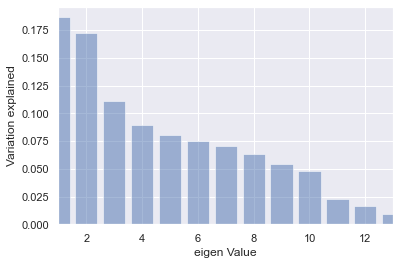

In [83]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.xlim(1,13)
plt.show()

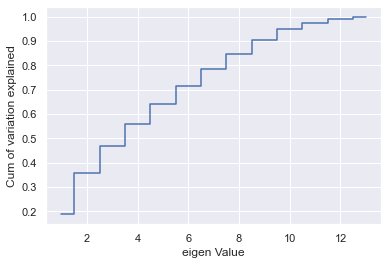

In [84]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

##### Now 8 dimensions seems very reasonable. With 8 variables we can explain over 80%-85% of the variation in the original data!

In [85]:
pca8 = PCA(n_components=8,random_state=42)
pca8.fit(XScaled)
#print(pca8.components_)
print(pca8.explained_variance_ratio_)
XScaledpca8 = pca8.transform(XScaled)

[0.18664165 0.17224514 0.11074986 0.08933567 0.0801526  0.07484908
 0.07086436 0.06372623]


### ICA

In [86]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=13,max_iter=200000, tol=1e-6,random_state=42,algorithm='parallel')
ica.fit(XScaledpca13)
#print(ica.components_)
XScaledica = ica.transform(XScaledpca13)

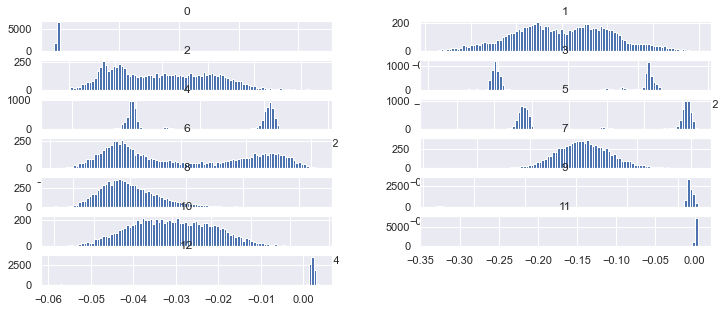

In [87]:
columns = list(pd.DataFrame(XScaledica))[:] # Excluding Outcome column which has only 
pd.DataFrame(XScaledica)[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

In [88]:
from sklearn.decomposition import FastICA
ica1 = FastICA(n_components=13,max_iter=200000, tol=1e-6,random_state=42,algorithm='deflation')
ica1.fit(XScaledpca13)
#print(ica.components_)
XScaledica1 = ica.transform(XScaledpca13)

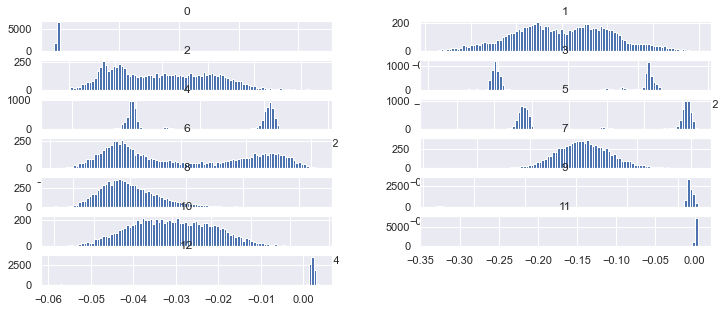

In [89]:
columns = list(pd.DataFrame(XScaledica1))[:] # Excluding Outcome column which has only 
pd.DataFrame(XScaledica1)[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

##### From above we can see that all features have been transformed and distributed normally and are mutually indepenednt

### Randomized Projections

In [90]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector = GaussianRandomProjection(n_components=10,random_state=42)
randomprojector.fit(XScaled)
#print(randomprojector.components_)
bikedataScaledrandomproject=randomprojector.transform(XScaled)

In [91]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector1 = GaussianRandomProjection(n_components=9,random_state=42)
randomprojector1.fit(XScaled)
#print(randomprojector.components_)
bikedataScaledrandomproject1=randomprojector1.transform(XScaled)

In [92]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector2 = GaussianRandomProjection(n_components=11,random_state=42)
randomprojector2.fit(XScaled)
#print(randomprojector.components_)
bikedataScaledrandomproject2=randomprojector2.transform(XScaled)

In [93]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector3 = GaussianRandomProjection(n_components=12,random_state=42)
randomprojector3.fit(XScaled)
#print(randomprojector.components_)
bikedataScaledrandomproject3=randomprojector3.transform(XScaled)

In [94]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector4 = GaussianRandomProjection(n_components=5,random_state=42)
randomprojector4.fit(XScaled)
#print(randomprojector.components_)
bikedataScaledrandomproject4=randomprojector4.transform(XScaled)

In [95]:
randomprojdf=pd.DataFrame(bikedataScaledrandomproject)
randomprojdf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.055111,2.571854,-0.465412,-0.261598,0.504815,-1.881825,1.638760,-0.992607,-0.431115,-1.005584
1,-0.561732,2.922134,-0.405684,-0.206399,0.087169,-1.958214,1.502755,-0.780347,-0.486984,-1.394328
2,-0.434195,2.787014,-0.490370,-0.211579,0.121000,-1.857645,1.551642,-0.755823,-0.459751,-1.402888
3,-0.447190,2.730918,-0.545367,-0.200305,0.074430,-1.790757,1.552049,-0.700978,-0.445292,-1.474790
4,0.185225,2.236594,-0.683267,-0.247457,0.380571,-1.637020,1.711935,-0.807611,-0.493111,-1.230883


In [96]:
randomprojdf1=pd.DataFrame(bikedataScaledrandomproject1)
randomprojdf2=pd.DataFrame(bikedataScaledrandomproject2)
randomprojdf3=pd.DataFrame(bikedataScaledrandomproject3)
randomprojdf4=pd.DataFrame(bikedataScaledrandomproject4)

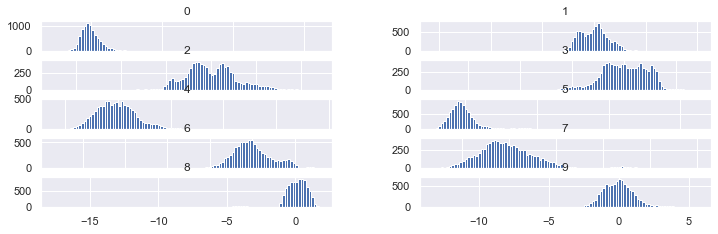

In [97]:
columns = list(pd.DataFrame(bikedataScaledrandomproject))[:] # Excluding Outcome column which has only 
pd.DataFrame(bikedataScaledrandomproject)[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

##### For Time Being we are taking 10 features as random projection subset we might need to experiment with nr of componenets during training the model and adjust the nr of feature to achieve the good performance for now we are taking as 10

### Task - III

### Applying K Means on PCA

In [98]:
XScaledpca8=pd.DataFrame(XScaledpca8)
x_pca = XScaledpca8.iloc[:,[4,1]].values
XScaledpca8.iloc[:,[4,1]].head()

,4,1
0,-0.624718,-0.336590
1,-0.747966,0.190380
2,-0.691487,0.101510
3,-0.667668,0.126248
4,-0.494039,-0.568051


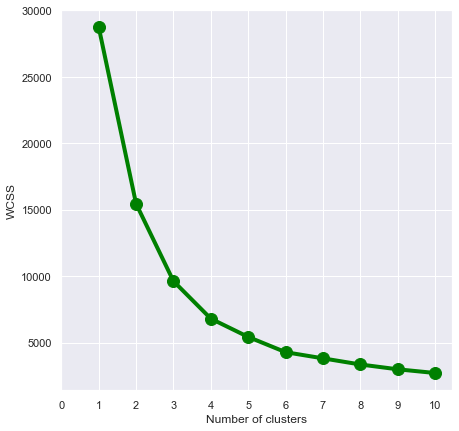

In [99]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_pca)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [100]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_pca)
bikedata['Cluster']=model.labels_
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,0
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,0


In [101]:
bikedataClust = bikedata.groupby(['Cluster'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
Cluster,,,,,,,,,,,,
0,0.661421,14.811155,13.998935,43.631335,2.263157,1738.422819,1.032236,0.001990,0.030386,0.240685,0.247628,0.268225
1,0.342870,8.276864,11.796576,72.433206,1.200969,1143.246001,0.118297,0.291485,0.118563,0.263122,0.256364,0.225501


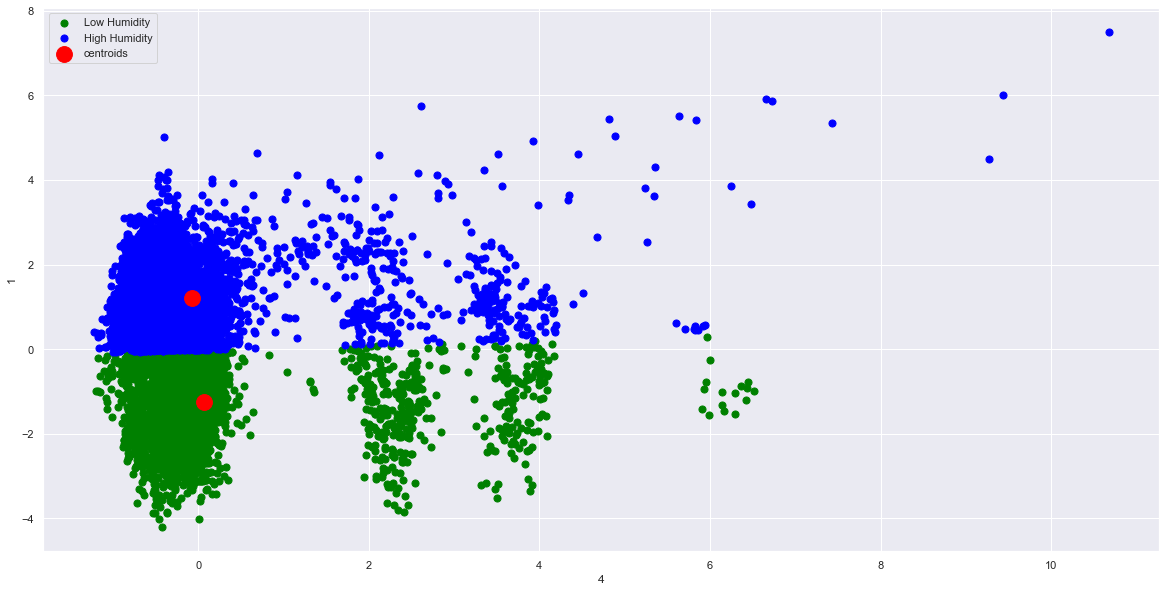

In [102]:
plt.figure(figsize = (20,10))
plt.scatter(x_pca[y_clusters == 0,0],x_pca[y_clusters == 0,1],s = 50, c = 'green', label = "Low Humidity")
plt.scatter(x_pca[y_clusters == 1,0],x_pca[y_clusters == 1,1],s = 50, c = 'blue', label = "High Humidity")
#plt.scatter(x_pca[y_clusters == 2,0],x_pca[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("4")
plt.ylabel("1")
plt.legend()
plt.show()

### Applying K Means on ICA

In [103]:
XScaledica=pd.DataFrame(XScaledica)
x_ica = XScaledica.iloc[:,[4,1]].values
XScaledica.iloc[:,[4,1]].head()

,4,1
0,0.010695,-0.013132
1,0.011004,-0.012725
2,0.011062,-0.011974
3,0.011143,-0.011208
4,0.010973,-0.010153


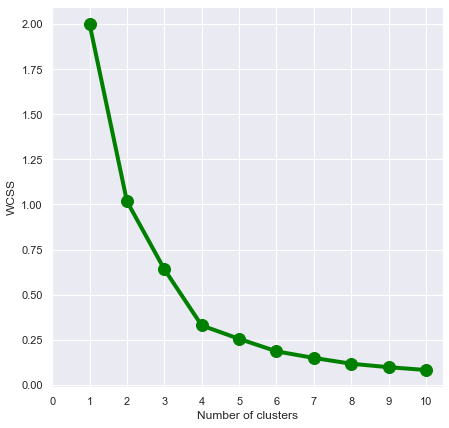

In [104]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_ica)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [105]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_ica)
bikedata['Cluster']=model.labels_
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,1
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,1


In [106]:
bikedataClust = bikedata.groupby(['Cluster'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
Cluster,,,,,,,,,,,,
0,0.695128,11.5,20.385861,62.120674,1.552391,1531.087659,0.64219,0.188479,0.028005,0.000000,0.502732,0.000000
1,0.303800,11.5,5.338759,54.310440,1.898375,1342.046016,0.49563,0.108677,0.122390,0.505495,0.000000,0.494505


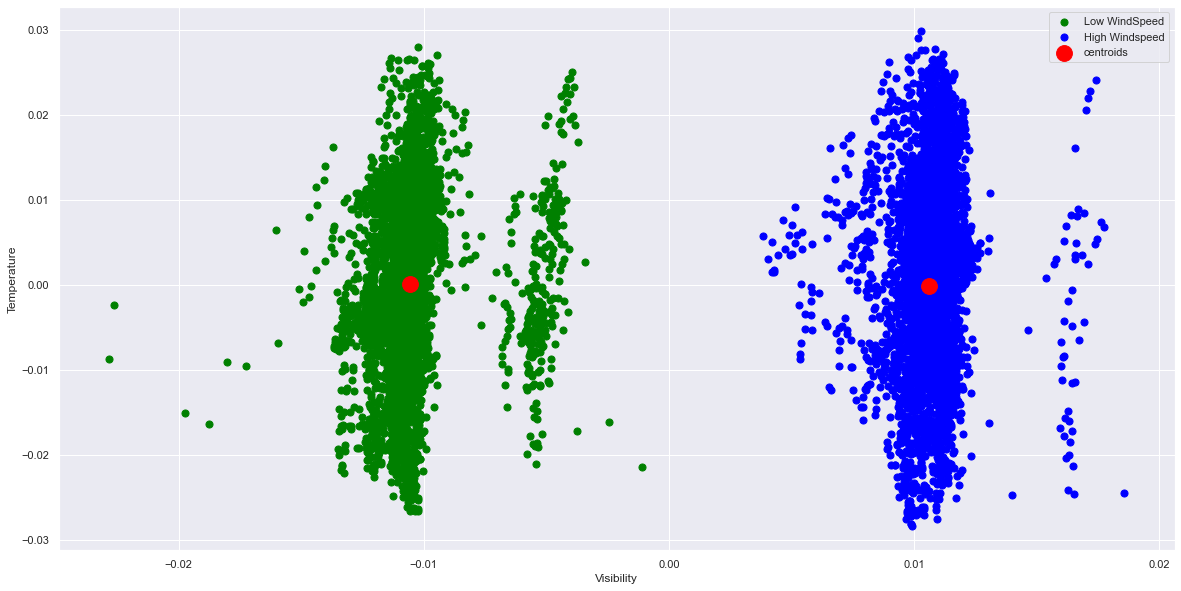

In [107]:
plt.figure(figsize = (20,10))
plt.scatter(x_ica[y_clusters == 0,0],x_ica[y_clusters == 0,1],s = 50, c = 'green', label = "Low WindSpeed")
plt.scatter(x_ica[y_clusters == 1,0],x_ica[y_clusters == 1,1],s = 50, c = 'blue', label = "High Windspeed")
#plt.scatter(x_ica[y_clusters == 2,0],x_ica[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
#plt.scatter(x_ica[y_clusters == 3,0],x_ica[y_clusters == 3,1],s = 50, c = 'orange', label = "Cluster 2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Applying K Means on RCA

In [108]:
x_rca = randomprojdf.iloc[:,[4,1]].values
randomprojdf.iloc[:,[4,1]].head()

,4,1
0,0.504815,2.571854
1,0.087169,2.922134
2,0.121000,2.787014
3,0.074430,2.730918
4,0.380571,2.236594


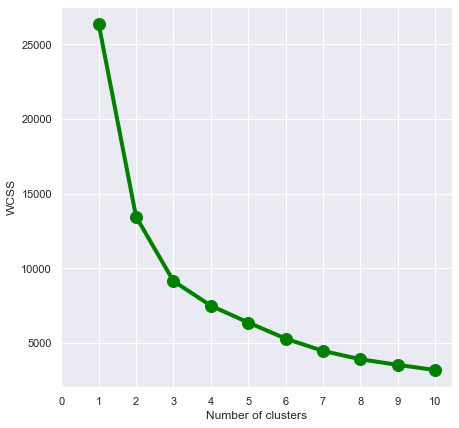

In [109]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_rca)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [110]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_rca)
bikedata['Cluster']=model.labels_
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,0
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,0
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,0
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,0
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,0


In [111]:
bikedataClust = bikedata.groupby(['Cluster'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter
Cluster,,,,,,,,,,,,
0,0.250978,8.175359,6.162299,59.114298,1.462538,1419.942634,0.202112,0.023381,0.142894,0.128857,0.138635,0.455889
1,0.775613,15.179654,20.321188,57.243386,2.015296,1455.511785,0.975298,0.287374,0.000000,0.388408,0.377585,0.014911


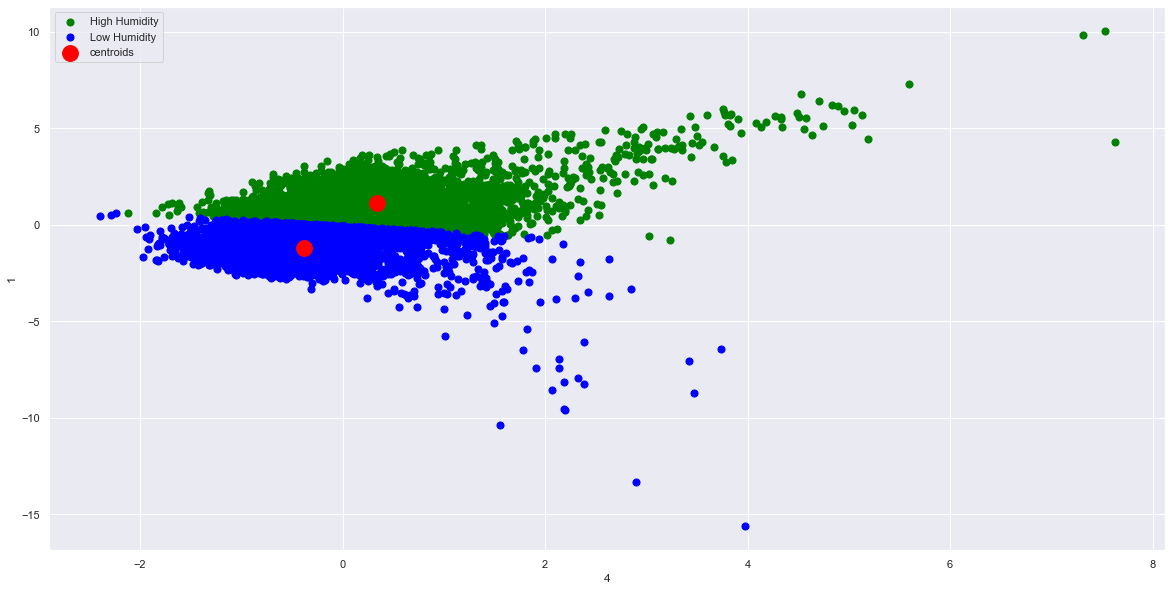

In [112]:
plt.figure(figsize = (20,10))
plt.scatter(x_rca[y_clusters == 0,0],x_rca[y_clusters == 0,1],s = 50, c = 'green', label = "High Humidity")
plt.scatter(x_rca[y_clusters == 1,0],x_rca[y_clusters == 1,1],s = 50, c = 'blue', label = "Low Humidity")
#plt.scatter(x_rca[y_clusters == 2,0],x_rca[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("4")
plt.ylabel("1")
plt.legend()
plt.show()

##### From above analysis we can say that PCA helped in clustering as it has moved all the data points towards centroid, though all feature transformations has done the same but PCA has made same distribution across all cluster where as ICA and RCA has failed to do so .

### Applying EM on PCA

In [113]:
x_EM = XScaledpca8.iloc[:,[4,1]].values
XScaledpca8.iloc[:,[4,1]].head()

,4,1
0,-0.624718,-0.336590
1,-0.747966,0.190380
2,-0.691487,0.101510
3,-0.667668,0.126248
4,-0.494039,-0.568051


In [114]:
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=42)
gmm.fit(x_EM)
yclust=gmm.predict(x_EM)
yclust

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
bikedata['Cluster_EM']=yclust
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster,Cluster_EM
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,0,0
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,0,0
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,0,0
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,0,0
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,0,0


In [116]:
bikedataClust = bikedata.groupby(['Cluster_EM'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
Cluster_EM,,,,,,,,,,,,,
0,0.536434,11.468635,12.829781,57.604993,1.718071,1448.405018,0.578231,0.033912,0.077836,0.258903,0.264352,0.248131,0.460525
1,0.169160,11.784810,13.365478,63.867664,1.786997,1331.680092,0.486295,1.190909,0.049942,0.189873,0.140391,0.232451,0.602992


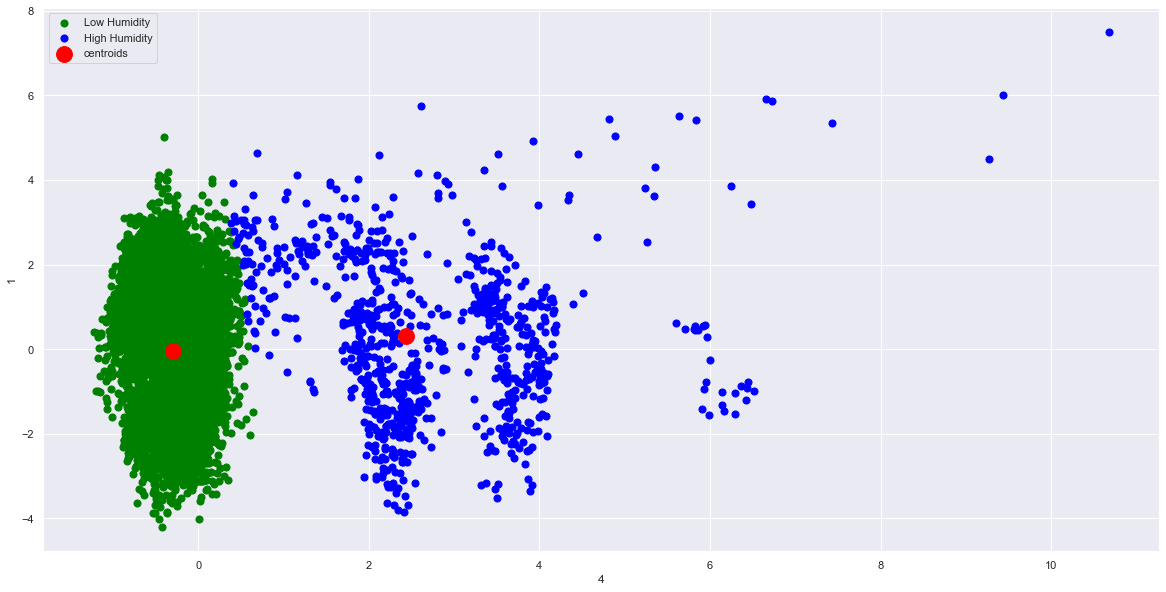

In [117]:
plt.figure(figsize = (20,10))
plt.scatter(x_EM[yclust == 0,0],x_EM[yclust == 0,1],s = 50, c = 'green', label = "Low Humidity")
plt.scatter(x_EM[yclust == 1,0],x_EM[yclust == 1,1],s = 50, c = 'blue', label = "High Humidity")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("4")
plt.ylabel("1")
plt.legend()
plt.show()

### Applying EM on ICA

In [118]:
XScaledica=pd.DataFrame(XScaledica)
x_EM = XScaledica.iloc[:,[4,1]].values
XScaledica.iloc[:,[4,1]].head()

,4,1
0,0.010695,-0.013132
1,0.011004,-0.012725
2,0.011062,-0.011974
3,0.011143,-0.011208
4,0.010973,-0.010153


In [119]:
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=42)
gmm.fit(x_EM)
yclust=gmm.predict(x_EM)
yclust

array([1, 1, 1, ..., 0, 0, 0])

In [120]:
bikedata['Cluster_EM']=yclust
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster,Cluster_EM
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,0,1


In [121]:
bikedataClust = bikedata.groupby(['Cluster_EM'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
Cluster_EM,,,,,,,,,,,,,
0,0.483735,14.265621,13.048678,66.847180,1.607114,1117.123567,0.153868,0.216335,0.075825,0.277791,0.249473,0.241985,0.517669
1,0.515489,8.866280,12.725072,50.016492,1.837085,1741.280366,0.964549,0.084266,0.074348,0.227546,0.254513,0.250947,0.433697


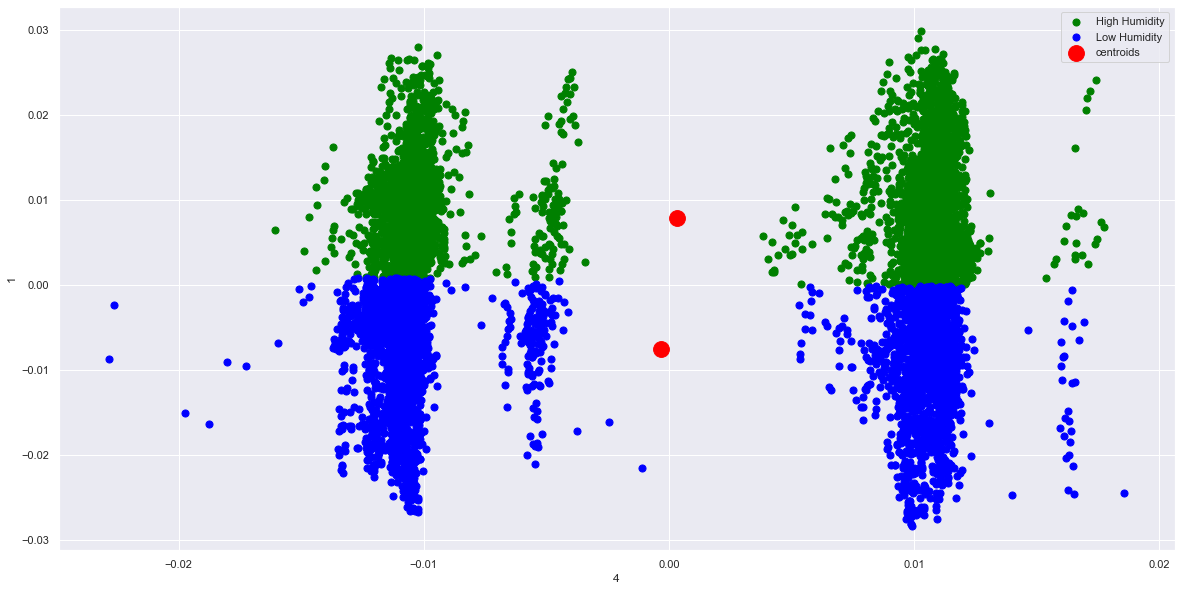

In [122]:
plt.figure(figsize = (20,10))
plt.scatter(x_EM[yclust == 0,0],x_EM[yclust == 0,1],s = 50, c = 'green', label = "High Humidity")
plt.scatter(x_EM[yclust == 1,0],x_EM[yclust == 1,1],s = 50, c = 'blue', label = "Low Humidity")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("4")
plt.ylabel("1")
plt.legend()
plt.show()

### Applying EM on RCA

In [123]:
x_EM = randomprojdf.iloc[:,[4,1]].values
randomprojdf.iloc[:,[4,1]].head()

,4,1
0,0.504815,2.571854
1,0.087169,2.922134
2,0.121000,2.787014
3,0.074430,2.730918
4,0.380571,2.236594


In [124]:
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=42)
gmm.fit(x_EM)
yclust=gmm.predict(x_EM)
yclust

array([1, 1, 1, ..., 0, 1, 1])

In [125]:
bikedata['Cluster_EM']=yclust
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster,Cluster_EM
0,0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
1,0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
2,0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
3,0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,1,0,1
4,0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,1,0,1


In [126]:
bikedataClust = bikedata.groupby(['Cluster_EM'])
bikedataClust.mean()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
Cluster_EM,,,,,,,,,,,,,
0,0.660617,14.791289,19.876225,62.671960,2.281760,1253.903358,0.866547,0.535390,0.000907,0.424229,0.374773,0.034029,0.910617
1,0.446004,10.393533,10.531910,56.731696,1.537706,1498.320775,0.469118,0.018685,0.100000,0.194173,0.210799,0.318029,0.328096


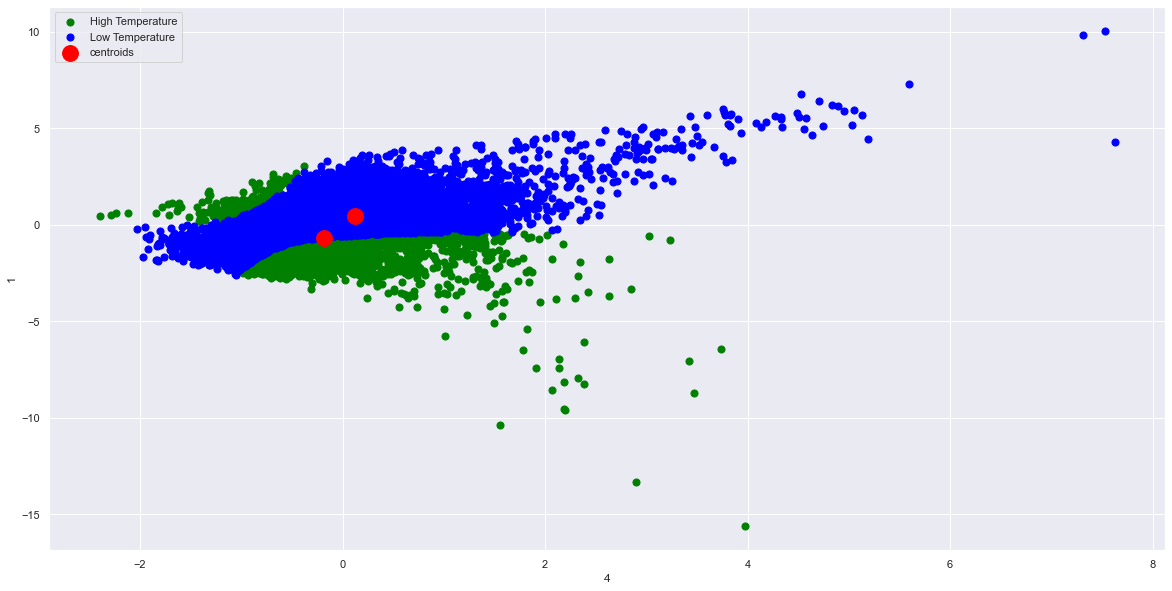

In [127]:
plt.figure(figsize = (20,10))
plt.scatter(x_EM[yclust == 0,0],x_EM[yclust == 0,1],s = 50, c = 'green', label = "High Temperature")
plt.scatter(x_EM[yclust == 1,0],x_EM[yclust == 1,1],s = 50, c = 'blue', label = "Low Temperature")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("4")
plt.ylabel("1")
plt.legend()
plt.show()

### Task - IV

### Applying Neural Network On Complete Feature Set

In [128]:
TrainscoreList=[]
TestscoreList=[]

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.30, random_state=42)

In [130]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnfullfeature=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnfullfeature.fit(X_train,y_train)
end_time=time.time()
Timetakenbymodel1=end_time-start_time
print(Timetakenbymodel1)
print(nnfullfeature.score(X_train,y_train))
print(nnfullfeature.score(X_test,y_test))

5.54761815071106
0.8793215916503587
0.875951293759513


In [131]:
TrainscoreList.append(nnfullfeature.score(X_train,y_train))
TestscoreList.append(nnfullfeature.score(X_test,y_test))
print(TrainscoreList,TestscoreList)

[0.8793215916503587] [0.875951293759513]


Confusion matrix, without normalization
[[1233   91]
 [ 235 1069]]
Normalized confusion matrix
[[0.93126888 0.06873112]
 [0.18021472 0.81978528]]


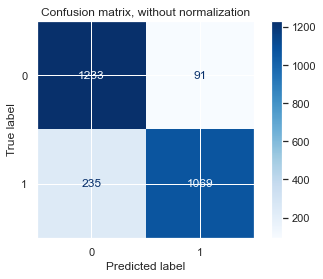

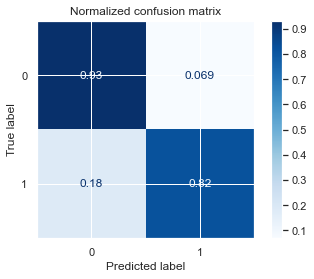

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnfullfeature,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [133]:
y_pred = nnfullfeature.predict(X_test) # This will give you positive class prediction probabilities  
nnfullfeature.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8755270791244231

Text(0.5, 0, 'False Positive Rate')

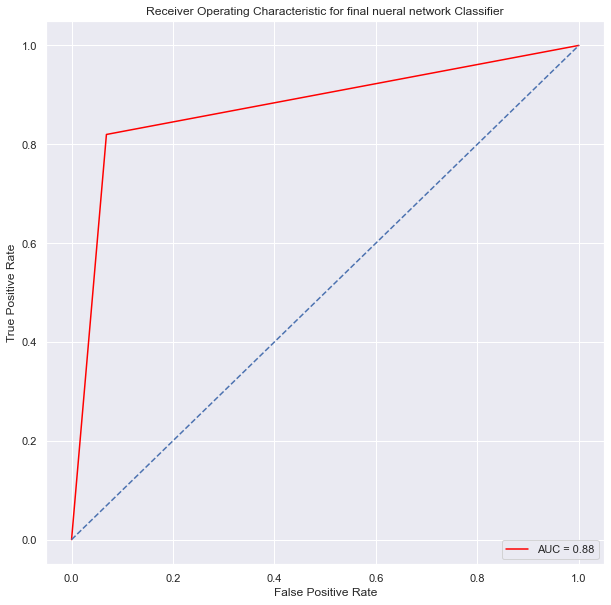

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Applying Neural Network on Decision Tree Dimensioanlity Reduction Feature Set

##### As per the output of decision tree feature importance table as we selected 7 important feature and they are Hour,Temp,Humidity,WindSpeed,visibility,Solar Radiation and Functioning Day

In [135]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   int64   
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall                 8760 non-null   float64 
 8   Snowfall                 8760 non-null   float64 
 9   Holiday                  8760 non-null   category
 10  FunctioningDay           8760 non-null   category
 11  Seasons_Spring           8760 non-null   uint8   
 12  Seasons_Summer           8760 non-null   uint8   
 13  Seasons_Winter           8760 non-null   uint8   
 14  Cluster 

In [136]:
bikedatadecisiontree=bikedata[["Rented Bike Count","Hour","Temperature(°C)","Humidity(%)","FunctioningDay"]]
bikedatadecisiontree.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),FunctioningDay
0,0,0,-5.2,37,1
1,0,1,-5.5,38,1
2,0,2,-6.0,39,1
3,0,3,-6.2,40,1
4,0,4,-6.0,36,1


In [137]:
X = bikedatadecisiontree.drop("Rented Bike Count", axis=1)
y = bikedatadecisiontree['Rented Bike Count']

In [138]:
X.head()

,Hour,Temperature(°C),Humidity(%),FunctioningDay
0,0,-5.2,37,1
1,1,-5.5,38,1
2,2,-6.0,39,1
3,3,-6.2,40,1
4,4,-6.0,36,1


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain_transform=sc.fit_transform(X_train)

In [141]:
Xtest_transform=sc.fit_transform(X_test)

In [142]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nndecisionmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nndecisionmodel.fit(Xtrain_transform,y_train)
end_time=time.time()
Timetaken2=end_time-start_time
print(Timetaken2)
print(nndecisionmodel.score(Xtrain_transform,y_train))
print(nndecisionmodel.score(Xtest_transform,y_test))

2.9598379135131836
0.8473581213307241
0.8439878234398782


In [143]:
TrainscoreList.append(nndecisionmodel.score(Xtrain_transform,y_train))
TestscoreList.append(nndecisionmodel.score(Xtest_transform,y_test))
print(TrainscoreList,TestscoreList)

[0.8793215916503587, 0.8473581213307241] [0.875951293759513, 0.8439878234398782]


Confusion matrix, without normalization
[[1164  160]
 [ 250 1054]]
Normalized confusion matrix
[[0.87915408 0.12084592]
 [0.19171779 0.80828221]]


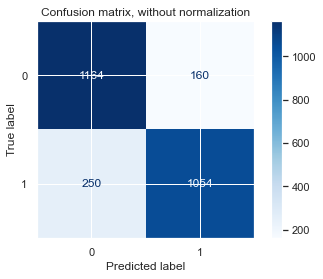

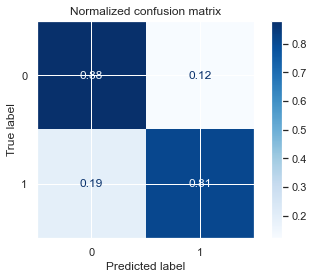

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nndecisionmodel,
        Xtest_transform,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [145]:
y_pred = nndecisionmodel.predict(Xtest_transform) # This will give you positive class prediction probabilities  
nndecisionmodel.score(Xtest_transform, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8437181435694029

Text(0.5, 0, 'False Positive Rate')

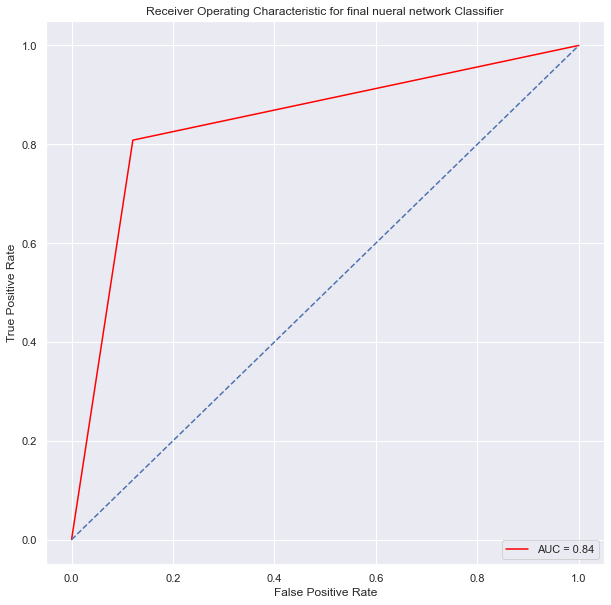

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Applying Neural Network on PCA Dimensioanlity Reduction Feature Set

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaledpca8, y, test_size=.30, random_state=42)

In [148]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnpcamodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnpcamodel.fit(X_train,y_train)
end_time=time.time()
Timetaken3=end_time-start_time
print(Timetaken3)
print(nnpcamodel.score(X_train,y_train))
print(nnpcamodel.score(X_test,y_test))

21.08215069770813
0.8879647749510763
0.8919330289193302


In [149]:
TrainscoreList.append(nnpcamodel.score(X_train,y_train))
TestscoreList.append(nnpcamodel.score(X_test,y_test))
print(TrainscoreList,TestscoreList)

[0.8793215916503587, 0.8473581213307241, 0.8879647749510763] [0.875951293759513, 0.8439878234398782, 0.8919330289193302]


Confusion matrix, without normalization
[[1220  104]
 [ 180 1124]]
Normalized confusion matrix
[[0.92145015 0.07854985]
 [0.13803681 0.86196319]]


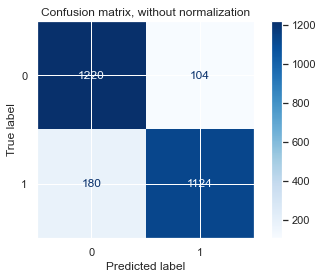

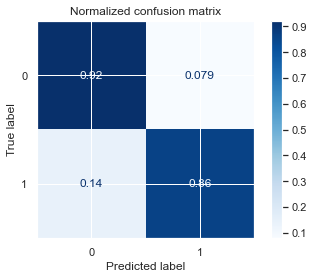

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnpcamodel,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [151]:
y_pred = nnpcamodel.predict(X_test) # This will give you positive class prediction probabilities  
nnpcamodel.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8917066706207255

Text(0.5, 0, 'False Positive Rate')

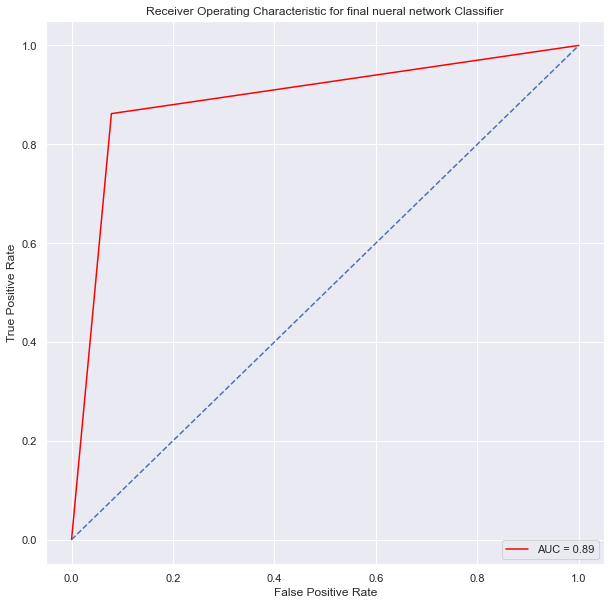

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Applying Neural Network on ICA Dimensioanlity Reduction Feature Set

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaledica, y, test_size=.30, random_state=42)

In [154]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnicamodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnicamodel.fit(X_train,y_train)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnicamodel.score(X_train,y_train))
print(nnicamodel.score(X_test,y_test))

0.4225749969482422
0.5578930202217873
0.5483257229832572


Confusion matrix, without normalization
[[ 333  991]
 [ 196 1108]]
Normalized confusion matrix
[[0.25151057 0.74848943]
 [0.15030675 0.84969325]]


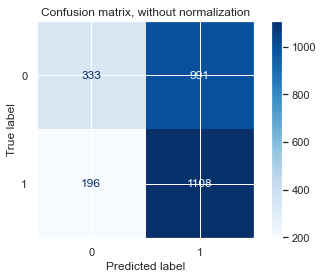

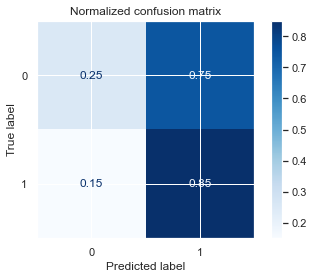

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnicamodel,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [156]:
y_pred = nnicamodel.predict(X_test) # This will give you positive class prediction probabilities  
nnicamodel.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5506019127759346

Text(0.5, 0, 'False Positive Rate')

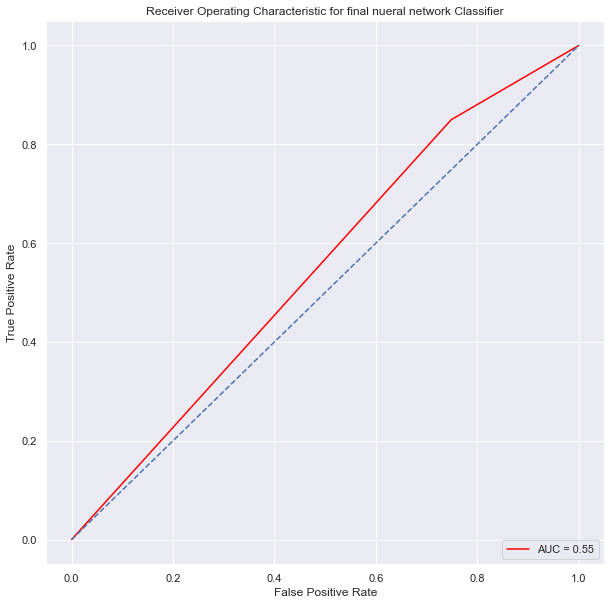

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaledica, y, test_size=.30, random_state=42)

In [159]:
from sklearn.tree import DecisionTreeClassifier

dTree1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree1.fit(X_train, y_train)
imp_features=dTree1.feature_importances_
imp_features

array([0.03714839, 0.03952705, 0.01958005, 0.18171642, 0.22565303,
       0.01890433, 0.28152708, 0.02103431, 0.00995903, 0.04020262,
       0.03402702, 0.06953426, 0.02118642])

In [160]:
XScaledicasubset=XScaledica[[0,3,4,5,7,8,9,11]]
XScaledicasubset.head()

,0,3,4,5,7,8,9,11
0,-0.003820,0.010931,0.010695,0.010657,-0.009920,0.006704,0.003451,0.000073
1,-0.003527,0.010921,0.011004,0.010640,-0.006238,-0.009746,0.003244,0.000004
2,-0.003565,0.010950,0.011062,0.010627,-0.005114,-0.007657,0.003219,0.000090
3,-0.003536,0.010977,0.011143,0.010611,-0.003554,-0.009055,0.003172,0.000142
4,-0.003784,0.011012,0.010973,0.010695,-0.008601,0.006089,0.003353,0.000137


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaledicasubset, y, test_size=.30, random_state=42)

In [162]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnicamodel1=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnicamodel1.fit(X_train,y_train)
end_time=time.time()
Timetaken4=end_time-start_time
print(Timetaken4)
print(nnicamodel1.score(X_train,y_train))
print(nnicamodel1.score(X_test,y_test))

0.6651849746704102
0.6588388780169602
0.6689497716894978


In [163]:
TrainscoreList.append(nnicamodel1.score(X_train,y_train))
TestscoreList.append(nnicamodel1.score(X_test,y_test))
print(TrainscoreList,TestscoreList)

[0.8793215916503587, 0.8473581213307241, 0.8879647749510763, 0.6588388780169602] [0.875951293759513, 0.8439878234398782, 0.8919330289193302, 0.6689497716894978]


Confusion matrix, without normalization
[[ 473  851]
 [  19 1285]]
Normalized confusion matrix
[[0.35725076 0.64274924]
 [0.01457055 0.98542945]]


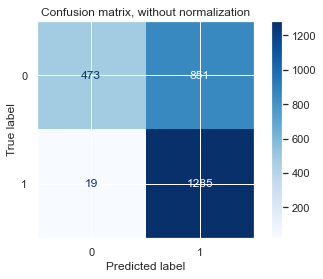

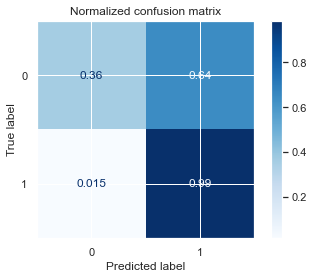

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnicamodel1,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [165]:
y_pred = nnicamodel1.predict(X_test) # This will give you positive class prediction probabilities  
nnicamodel1.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.671340101569885

Text(0.5, 0, 'False Positive Rate')

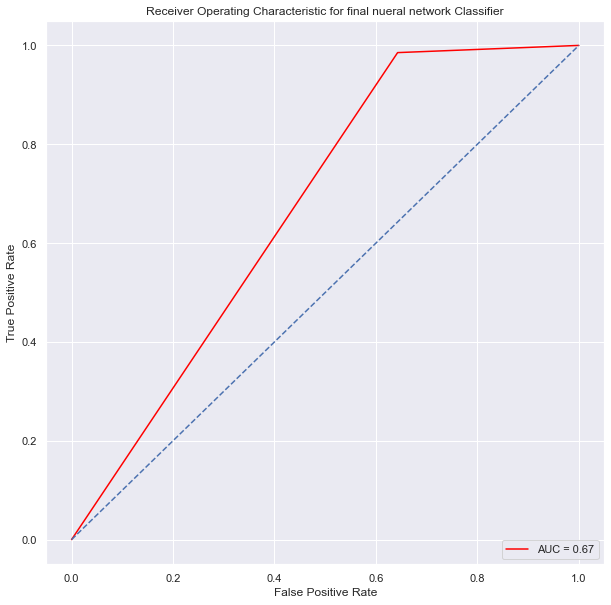

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Applying Neural Network on RCA Dimensioanlity Reduction Feature Set

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(randomprojdf, y, test_size=.30, random_state=42)

In [168]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnrcamodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnrcamodel.fit(X_train,y_train)
end_time=time.time()
Timetaken5=end_time-start_time
print(Timetaken5)
print(nnrcamodel.score(X_train,y_train))
print(nnrcamodel.score(X_test,y_test))

24.688981294631958
0.8778538812785388
0.8812785388127854


In [169]:
TrainscoreList.append(nnrcamodel.score(X_train,y_train))
TestscoreList.append(nnrcamodel.score(X_test,y_test))
print(TrainscoreList,TestscoreList)

[0.8793215916503587, 0.8473581213307241, 0.8879647749510763, 0.6588388780169602, 0.8778538812785388] [0.875951293759513, 0.8439878234398782, 0.8919330289193302, 0.6689497716894978, 0.8812785388127854]


In [170]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(randomprojdf1, y, test_size=.30, random_state=42)
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnrcamodel1=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnrcamodel1.fit(X_train1,y_train1)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnrcamodel1.score(X_train1,y_train1))
print(nnrcamodel1.score(X_test1,y_test1))

8.357407093048096
0.8703522504892368
0.874048706240487


In [171]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(randomprojdf2, y, test_size=.30, random_state=42)
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnrcamodel2=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnrcamodel2.fit(X_train2,y_train2)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnrcamodel2.score(X_train2,y_train2))
print(nnrcamodel2.score(X_test2,y_test2))

7.392327070236206
0.87279843444227
0.8767123287671232


In [172]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(randomprojdf3, y, test_size=.30, random_state=42)
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnrcamodel3=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnrcamodel3.fit(X_train3,y_train3)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnrcamodel3.score(X_train3,y_train3))
print(nnrcamodel3.score(X_test3,y_test3))

18.381515979766846
0.9054142204827136
0.9056316590563166


In [173]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(randomprojdf4, y, test_size=.30, random_state=42)
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnrcamodel4=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnrcamodel4.fit(X_train4,y_train4)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnrcamodel4.score(X_train4,y_train4))
print(nnrcamodel4.score(X_test4,y_test4))

23.582896947860718
0.8515981735159818
0.8466514459665144


##### From the above experiment we can say at n_components=10 RCA is good than n_components=5 and after n_components=10 ther eis no much difference

Confusion matrix, without normalization
[[1213  111]
 [ 201 1103]]
Normalized confusion matrix
[[0.91616314 0.08383686]
 [0.1541411  0.8458589 ]]


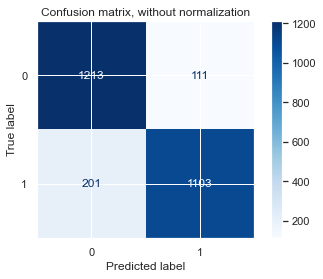

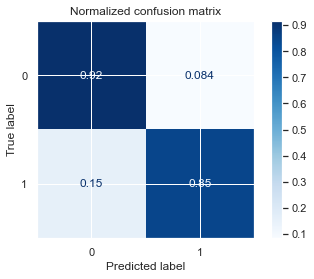

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnrcamodel,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [175]:
y_pred = nnrcamodel.predict(X_test) # This will give you positive class prediction probabilities  
nnrcamodel.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8810110188497396

Text(0.5, 0, 'False Positive Rate')

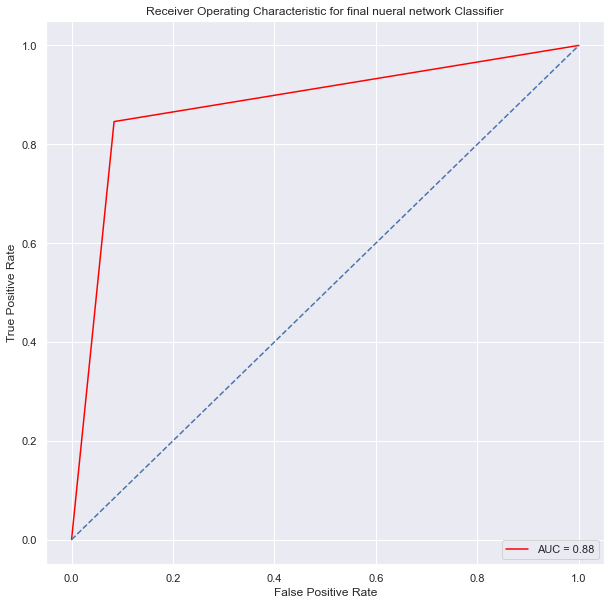

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

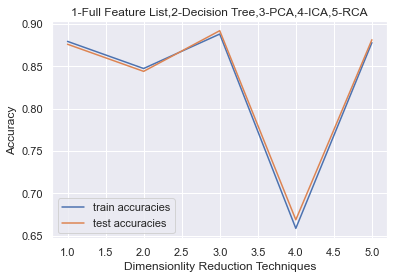

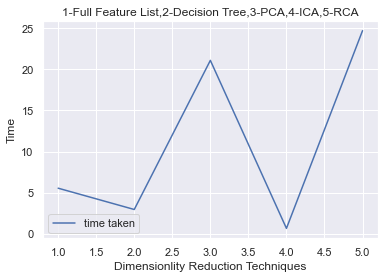

In [177]:
DimensioanlityReduction=[1,2,3,4,5]
TimeTakenList=[Timetakenbymodel1,Timetaken2,Timetaken3,Timetaken4,Timetaken5]
plt.plot(DimensioanlityReduction, TrainscoreList,label="train accuracies")
plt.plot(DimensioanlityReduction, TestscoreList,label="test accuracies")
plt.legend(loc="lower left")
plt.xlabel("Dimensionlity Reduction Techniques")
plt.ylabel("Accuracy")
plt.title("1-Full Feature List,2-Decision Tree,3-PCA,4-ICA,5-RCA")
plt.show()

plt.plot(DimensioanlityReduction, TimeTakenList,label="time taken")
plt.legend(loc="lower left")
plt.xlabel("Dimensionlity Reduction Techniques")
plt.ylabel("Time")
plt.title("1-Full Feature List,2-Decision Tree,3-PCA,4-ICA,5-RCA")
plt.show()

### Task - V

### Applying Neural Networks by K-Means and Expecation Maximization Output

In [178]:
XScaled.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015


In [179]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Rented Bike Count, dtype: int64

In [180]:
x = XScaled.iloc[:,[4,1]].values
XScaled.iloc[:,[4,1]].head()

,Visibility (10m),Temperature(°C)
0,0.925871,-1.513957
1,0.925871,-1.539074
2,0.925871,-1.580936
3,0.925871,-1.597680
4,0.925871,-1.580936


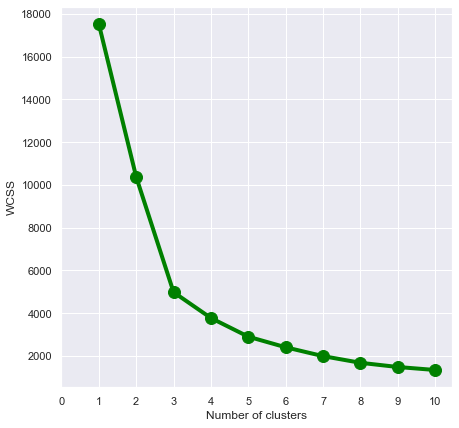

In [181]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [182]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [183]:
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(x)
yclust=gmm.predict(x)
yclust

array([0, 0, 0, ..., 2, 2, 2])

In [184]:
XScaled['Cluster_KM']=y_clusters
XScaled['Cluster_EM']=yclust
XScaled.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster_KM,Cluster_EM
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015,2,0
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015,2,0
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015,2,0
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015,2,0
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,-0.227757,0.18668,-0.580514,-0.580514,1.748015,2,0


In [185]:
XScaledsubset=XScaled[['Cluster_KM','Cluster_EM']]
XScaledsubset.head()

,Cluster_KM,Cluster_EM
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaledsubset, y, test_size=.30, random_state=42)

In [187]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnclustersmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnclustersmodel.fit(X_train,y_train)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nnclustersmodel.score(X_train,y_train))
print(nnclustersmodel.score(X_test,y_test))

6.032582998275757
0.7211350293542075
0.7336377473363774


Confusion matrix, without normalization
[[1109  215]
 [ 485  819]]
Normalized confusion matrix
[[0.83761329 0.16238671]
 [0.37193252 0.62806748]]


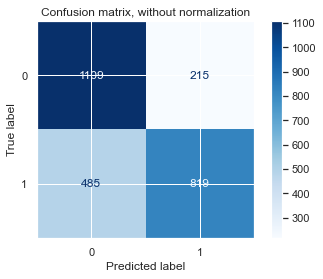

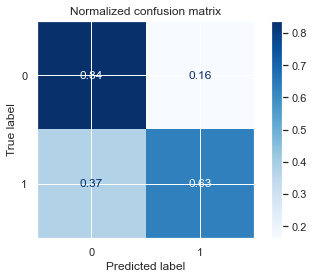

In [188]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnclustersmodel,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [189]:
y_pred = nnclustersmodel.predict(X_test) # This will give you positive class prediction probabilities  
nnclustersmodel.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7328403888569681

Text(0.5, 0, 'False Positive Rate')

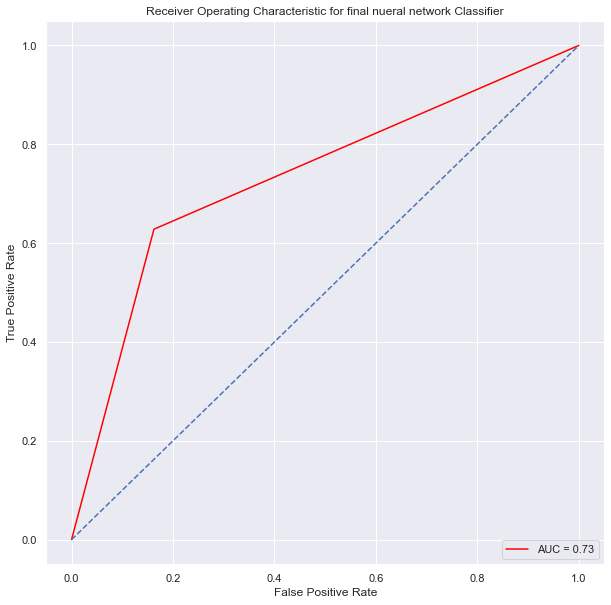

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### THE END OF Code please refer Document for Observations